# Демонстрация работы с TouchstoneDataset и TouchstoneDatasetAnalyzer




Сначала необходимо загрузить библиотеку **MWLab** с [GitHub](https://github.com/IztvAV/mwlab).

In [1]:
import sys
from IPython.display import clear_output

!git clone https://github.com/IztvAV/mwlab.git git_mwlab
clear_output()

sys.path.append("/content/git_mwlab")

Библиотека **MWLab** использует некоторые возможности пакета с открытым исходным кодом — [scikit-rf](https://scikit-rf.org/). Поэтому перед началом работы с **MWLab** необходимо также установить **scikit-rf**.

In [2]:
!pip install scikit-rf
clear_output()

import skrf as rf

In [3]:
from pathlib import Path
import matplotlib.pyplot as plt

from mwlab import TouchstoneDataset
from mwlab import TouchstoneDatasetAnalyzer
from mwlab.transforms import TComposite
from mwlab.transforms.x_transforms import X_SelectKeys
from mwlab.transforms.s_transforms import S_Crop, S_Resample

Воспользуемся готовым набором Touchstone-файлов из библиотеки **MWLab**,  
содержащим результаты моделирования S-параметров СВЧ-фильтра 12-го порядка,  
полученные для различных значений параметров электромагнитной модели.

In [4]:
DATA_DIR = "/content/git_mwlab/Data/Filter12"

## 1 Доступ к набору данных и его анализ


### Загрузка набора Touchstone-файлов и инициализация анализатора

В библиотеке **MWLab** предусмотрен специальный класс `TouchstoneDataset`,  
предназначенный для загрузки набора Touchstone-файлов из указанной директории.

Каждый файл содержит результаты расчета S-параметров и значения параметров электромагнитной модели.  
Класс `TouchstoneDataset` предоставляет удобный интерфейс для доступа к этим данным и дальнейшего анализа.


In [5]:
# Загружаем набор Touchstone-файлов
ds = TouchstoneDataset(root=DATA_DIR)

print(f"Загружено файлов: {len(ds)}")
print("Пример параметров из первого файла:")
print(ds[0][0], "\n")

Загружено файлов: 200
Пример параметров из первого файла:
{'cavity_h': 16.0, 'cavity_l0': 10.0, 'cavity_l1': 15.2223, 'cavity_l2': 16.8534, 'cavity_l3': 17.1243, 'cavity_l4': 17.257, 'cavity_l5': 17.1229, 'cavity_l6': 17.5688, 'cavity_r': 2.5, 'cavity_screw_l': 0.5, 'cavity_screw_r': 1.5, 'cavity_w': 8.0, 'iris_h00': 0.0, 'iris_h01': 8.8082, 'iris_h112': 0.0, 'iris_h12': 5.6076, 'iris_h211': 3.6561, 'iris_h23': 5.2047, 'iris_h310': 3.9794, 'iris_h34': 5.0897, 'iris_h45': 4.9215, 'iris_h49': 4.618, 'iris_h56': 4.8019, 'iris_h58': 4.4341, 'iris_h67': 6.5748, 'iris_rx': 0.1, 'iris_screw_l': 0.5, 'iris_screw_r': 1.5, 'iris_shift00': 0.0, 'iris_shift112': 0.0, 'iris_shift211': 3.5, 'iris_shift310': 0.0, 'iris_shift49': 0.0, 'iris_shift58': 3.5, 'iris_shift67': 3.5, 'iris_tx': 4.5, 'iris_tz': 4.5, 'iris_w00': 0.0, 'iris_w112': 0.0, 'iris_w211': 4.0, 'iris_w310': 3.9794, 'iris_w49': 4.618, 'iris_w58': 4.0, 'iris_w67': 4.0, 'mesh_cavity': 5.0, 'mesh_iris': 7.0, 'mesh_screw': 7.0, 'order': 12.0

Другой полезный инструмент библиотеки **MWLab** — класс `TouchstoneDatasetAnalyzer`,  
предназначенный для удобного анализа и визуализации набора Touchstone-файлов.

Он позволяет группировать данные, строить графики, выполнять сравнение и другие операции,  
что особенно полезно при работе с большими объёмами моделирования.


In [6]:
# Создаем объект анализатора на основе загруженного набора
analyzer = TouchstoneDatasetAnalyzer(ds)

### Извлечение таблицы параметров из набора

С помощью метода `get_params_df()` можно получить сводную таблицу параметров (в виде `pandas.DataFrame`),  
содержащую значения всех параметров электромагнитной модели из каждого Touchstone-файла в наборе.

Такую таблицу удобно использовать для:

- предварительного анализа структуры данных,
- фильтрации и группировки по параметрам,
- построения графиков зависимости характеристик от параметров модели,
- подготовки данных к обучению моделей машинного обучения.

Ниже выводятся первые строки таблицы параметров.

In [7]:
# Получаем таблицу параметров из всех файлов набора
df = analyzer.get_params_df()

print("Несколько строк из таблицы параметров:")
df.head()

Несколько строк из таблицы параметров:


,cavity_h,cavity_l0,cavity_l1,cavity_l2,cavity_l3,cavity_l4,cavity_l5,cavity_l6,cavity_r,cavity_screw_l,...,iris_w310,iris_w49,iris_w58,iris_w67,mesh_cavity,mesh_iris,mesh_screw,order,reset_all,sigma
0,16.0,10.0,15.2223,16.8534,17.1243,17.2570,17.1229,17.5688,2.5,0.5,...,3.9794,4.6180,4.0,4.0,5.0,7.0,7.0,12.0,0.0,48000000.0
1,16.0,10.0,15.2292,16.8302,17.1369,17.2518,17.1681,17.6195,2.5,0.5,...,3.9716,4.6088,4.0,4.0,5.0,7.0,7.0,12.0,0.0,48000000.0
2,16.0,10.0,15.1701,16.8843,17.0814,17.3094,17.1483,17.5959,2.5,0.5,...,3.9793,4.6258,4.0,4.0,5.0,7.0,7.0,12.0,0.0,48000000.0
3,16.0,10.0,15.2298,16.8192,17.0717,17.2862,17.1360,17.6114,2.5,0.5,...,3.9609,4.6099,4.0,4.0,5.0,7.0,7.0,12.0,0.0,48000000.0
4,16.0,10.0,15.2085,16.8552,17.0799,17.2599,17.1325,17.6390,2.5,0.5,...,3.9638,4.6184,4.0,4.0,5.0,7.0,7.0,12.0,0.0,48000000.0


### Сводная статистика по параметрам модели

Метод `summarize_params()` возвращает таблицу с базовой статистикой по всем числовым параметрам в датасете:  
средние значения (`mean`), стандартное отклонение (`std`), минимумы (`min`), максимумы (`max`), количество незаданных значений (`nan`),  
а также признак того, изменяется ли параметр в данном наборе данных (`is_constant`).

Это позволяет быстро оценить структуру параметров и выявить отсутствующие или неизменяющиеся значения.



In [8]:
# Получаем сводную статистику по параметрам (средние, мин, макс, std и т.д.)
summary = analyzer.summarize_params()

print("\nСводная статистика по параметрам:")
summary.T  # Транспонируем для удобства отображения


Сводная статистика по параметрам:


,mean,std,min,max,nan_count,is_constant
cavity_h,16.0,0.0,16.0,16.0,0,True
cavity_l0,10.0,0.0,10.0,10.0,0,True
cavity_l1,15.198227,0.022357,15.1608,15.2361,0,False
cavity_l2,16.84394,0.024287,16.8011,16.8843,0,False
cavity_l3,17.10586,0.024642,17.0611,17.1461,0,False
cavity_l4,17.266432,0.025621,17.2244,17.31,0,False
cavity_l5,17.129372,0.024992,17.0867,17.1717,0,False
cavity_l6,17.598689,0.02572,17.554,17.6414,0,False
cavity_r,2.5,0.0,2.5,2.5,0,True
cavity_screw_l,0.5,0.0,0.5,0.5,0,True


### Определение изменяемых параметров

С помощью метода `get_varying_keys()` можно получить список параметров,  
значения которых **меняются** от одного Touchstone-файла к другому.

Это полезно для того, чтобы:

- выделить только варьируемые параметры (например, для построения графиков зависимости),
- исключить постоянные параметры из анализа,
- упростить визуализацию многомерных данных.


In [9]:
# Получаем список параметров, которые изменяются в наборе данных
varying = analyzer.get_varying_keys()

print("\nИзменяемые параметры:", varying)


Изменяемые параметры: ['cavity_l1', 'cavity_l2', 'cavity_l3', 'cavity_l4', 'cavity_l5', 'cavity_l6', 'iris_h01', 'iris_h12', 'iris_h211', 'iris_h23', 'iris_h310', 'iris_h34', 'iris_h45', 'iris_h49', 'iris_h56', 'iris_h58', 'iris_h67', 'iris_w310', 'iris_w49']


### Визуализация распределения параметров

С помощью метода `plot_param_distributions()` можно построить графики распределения значений параметров.  
Это позволяет оценить диапазоны и форму распределения каждого параметра —  
например, равномерное, нормальное распределение или наличие выбросов.

На графике ниже отображены гистограммы для первых трех изменяемых параметров, выявленных ранее.


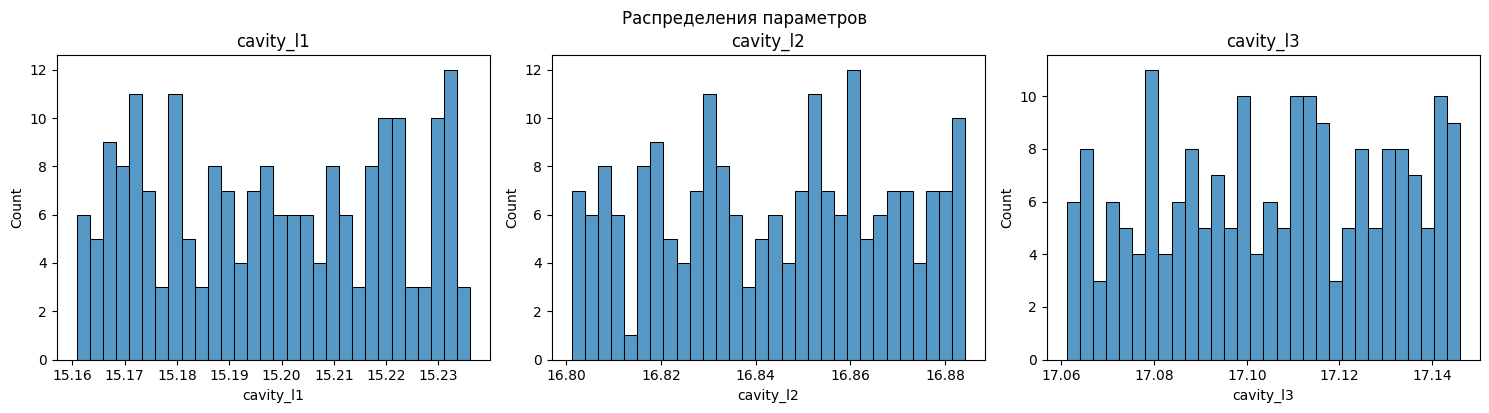

In [10]:
# Построим распределения первых трех изменяемых параметров
fig = analyzer.plot_param_distributions(varying[0:3])
fig.suptitle("Распределения параметров", y=1.02)
plt.show()

### S-параметры: сводная статистика

Аналогично методу `summarize_params()`, метод `summarize_s_components()` возвращает сводную таблицу,  
содержащую базовую статистику для всех компонентов S-параметров, усредненную по всем объектам в датасете  
и по частотным точкам. В таблице приводятся следующие показатели:

- средние значения (`mean`),
- стандартное отклонение (`std`),
- минимумы (`min`),
- максимумы (`max`),
- количество незаданных значений (`nan`),
- признак того, изменяется ли S-компонента в данном наборе данных (`is_constant`).



In [11]:
# Получаем сводную статистику по всем компонентам S-параметров
# (усреднение по объектам и по частоте: среднее, std, min, max, nan и т.д.)
summary_s = analyzer.summarize_s_components()

print("\nСводная статистика по S-параметрам:")
summary_s.T  # Транспонируем для более удобного отображения


Сводная статистика по S-параметрам:


,mean,std,min,max,nan_count,is_constant
S11.real,-0.003307,0.635304,-0.973399,0.93294,0,False
S11.imag,0.033563,0.51423,-0.90842,0.974994,0,False
S12.real,-0.000065,0.125657,-0.569852,0.562197,0,False
S12.imag,-0.000039,0.125657,-0.55985,0.566135,0,False
S21.real,-0.000065,0.125657,-0.569852,0.562197,0,False
S21.imag,-0.000039,0.125657,-0.55985,0.566135,0,False
S22.real,-0.004254,0.636224,-0.973297,0.932943,0,False
S22.imag,0.033513,0.51324,-0.908309,0.974105,0,False


### Визуализация статистик по S-параметрам

Метод `plot_s_stats()` позволяет построить графики статистик S-параметров по всем файлам набора.  
Можно выбрать порт входа и выхода, интересующую метрику (`'db'`, `'mag'`, `'deg'`)  
и список отображаемых статистик, таких как:
- среднее (`mean`),  
- стандартное отклонение (`std`),  
- минимум (`min`),  
- максимум (`max`).


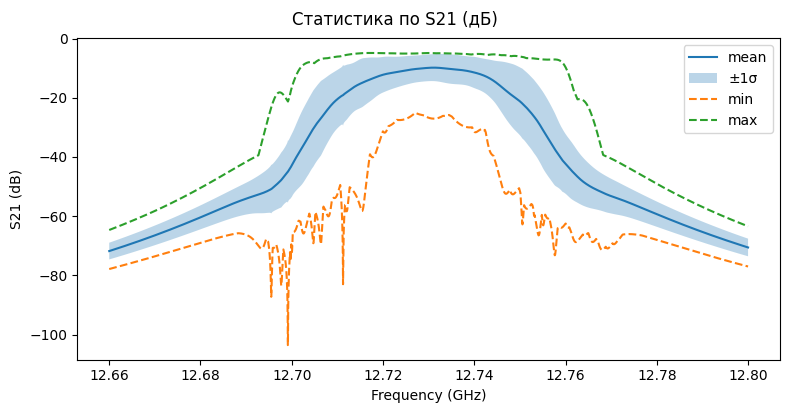

In [12]:
# Пример визуализации статистик S‑параметра S21 (модуль в децибелах)
fig = analyzer.plot_s_stats(
    port_out=2, port_in=1, metric='db', stats=['mean', 'std', 'min', 'max']
)
fig.suptitle("Статистика по S21 (дБ)", y=1.02)
plt.show()

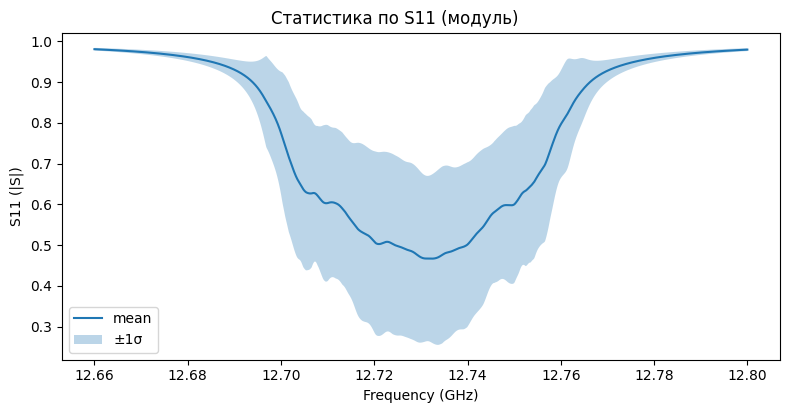

In [13]:
# Пример визуализации статистик S‑параметра S11 (модуль в абсолютных значениях)
fig = analyzer.plot_s_stats(
    port_out=1, port_in=1, metric='mag', stats=['mean', 'std']
)
fig.suptitle("Статистика по S11 (модуль)", y=1.02)
plt.show()

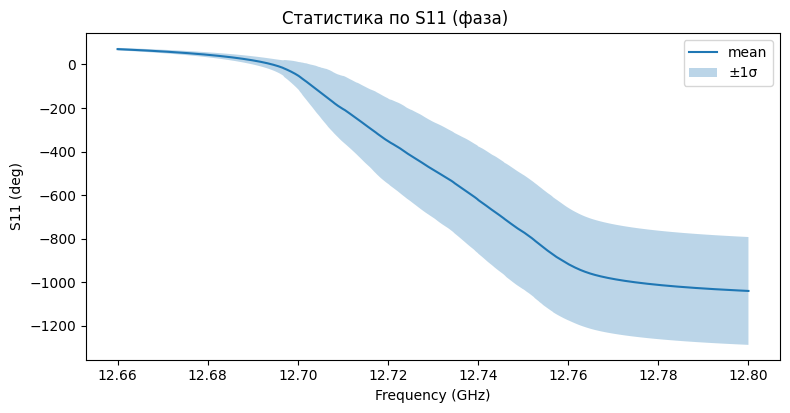

In [14]:
# Пример визуализации статистик S‑параметра S11 (фаза в градусах)
fig = analyzer.plot_s_stats(
    port_out=1, port_in=1, metric='deg', stats=['mean', 'std']
)
fig.suptitle("Статистика по S11 (фаза)", y=1.02)
plt.show()

## 2 Трансформация параметров: использование `X_SelectKeys`

### Отбор параметров с помощью `X_SelectKeys`

Параметры (`X`) электромагнитной модели из набора данных можно предварительно отобрать (трансформировать) "на лету" перед дальнейшей обработкой.  
Для этого в **MWLab** предусмотрен объект `X_SelectKeys`, который позволяет оставить только нужные параметры — например, только те, что изменяются в датасете.

В этом случае при создании объекта `X_SelectKeys` в конструктор передаётся список ключей (названий параметров), которые нужно оставить в данных.




In [15]:
# Найдем список изменяемых параметров
varying = analyzer.get_varying_keys()

# Используем его как аргумент для X-преобразования (отбор только изменяемых параметров)
x_tf = X_SelectKeys(varying)

# Создаем новый датасет с примененной X-трансформацией
ds_x = TouchstoneDataset(root=DATA_DIR, x_tf=x_tf)

# Инициализируем анализатор на основе преобразованного датасета
analyzer_x = TouchstoneDatasetAnalyzer(ds_x)

### Анализ параметров после X-преобразования

После применения `X_SelectKeys` в наборе остаются только отобранные параметры.  
Методы `summarize_params()` и `plot_param_distributions()` можно использовать повторно,  
чтобы пересчитать статистику и построить гистограммы уже по фильтрованному множеству параметров.

Это удобно для проверки корректности выбора параметров и для фокусного анализа только тех величин,  
которые действительно варьируются в модели.

In [16]:
# Получаем статистику по параметрам после применения X_SelectKeys
summary_x = analyzer_x.summarize_params()

print("\nСтатистика по параметрам после преобразования X_SelectKeys:")
summary_x.T


Статистика по параметрам после преобразования X_SelectKeys:


,mean,std,min,max,nan_count,is_constant
cavity_l1,15.198227,0.022357,15.1608,15.2361,0,False
cavity_l2,16.84394,0.024287,16.8011,16.8843,0,False
cavity_l3,17.10586,0.024642,17.0611,17.1461,0,False
cavity_l4,17.266432,0.025621,17.2244,17.31,0,False
cavity_l5,17.129372,0.024992,17.0867,17.1717,0,False
cavity_l6,17.598689,0.02572,17.554,17.6414,0,False
iris_h01,8.819281,0.012789,8.798,8.842,0,False
iris_h12,5.599827,0.008639,5.586,5.6139,0,False
iris_h211,3.660149,0.005456,3.6509,3.669,0,False
iris_h23,5.200184,0.007241,5.187,5.2128,0,False


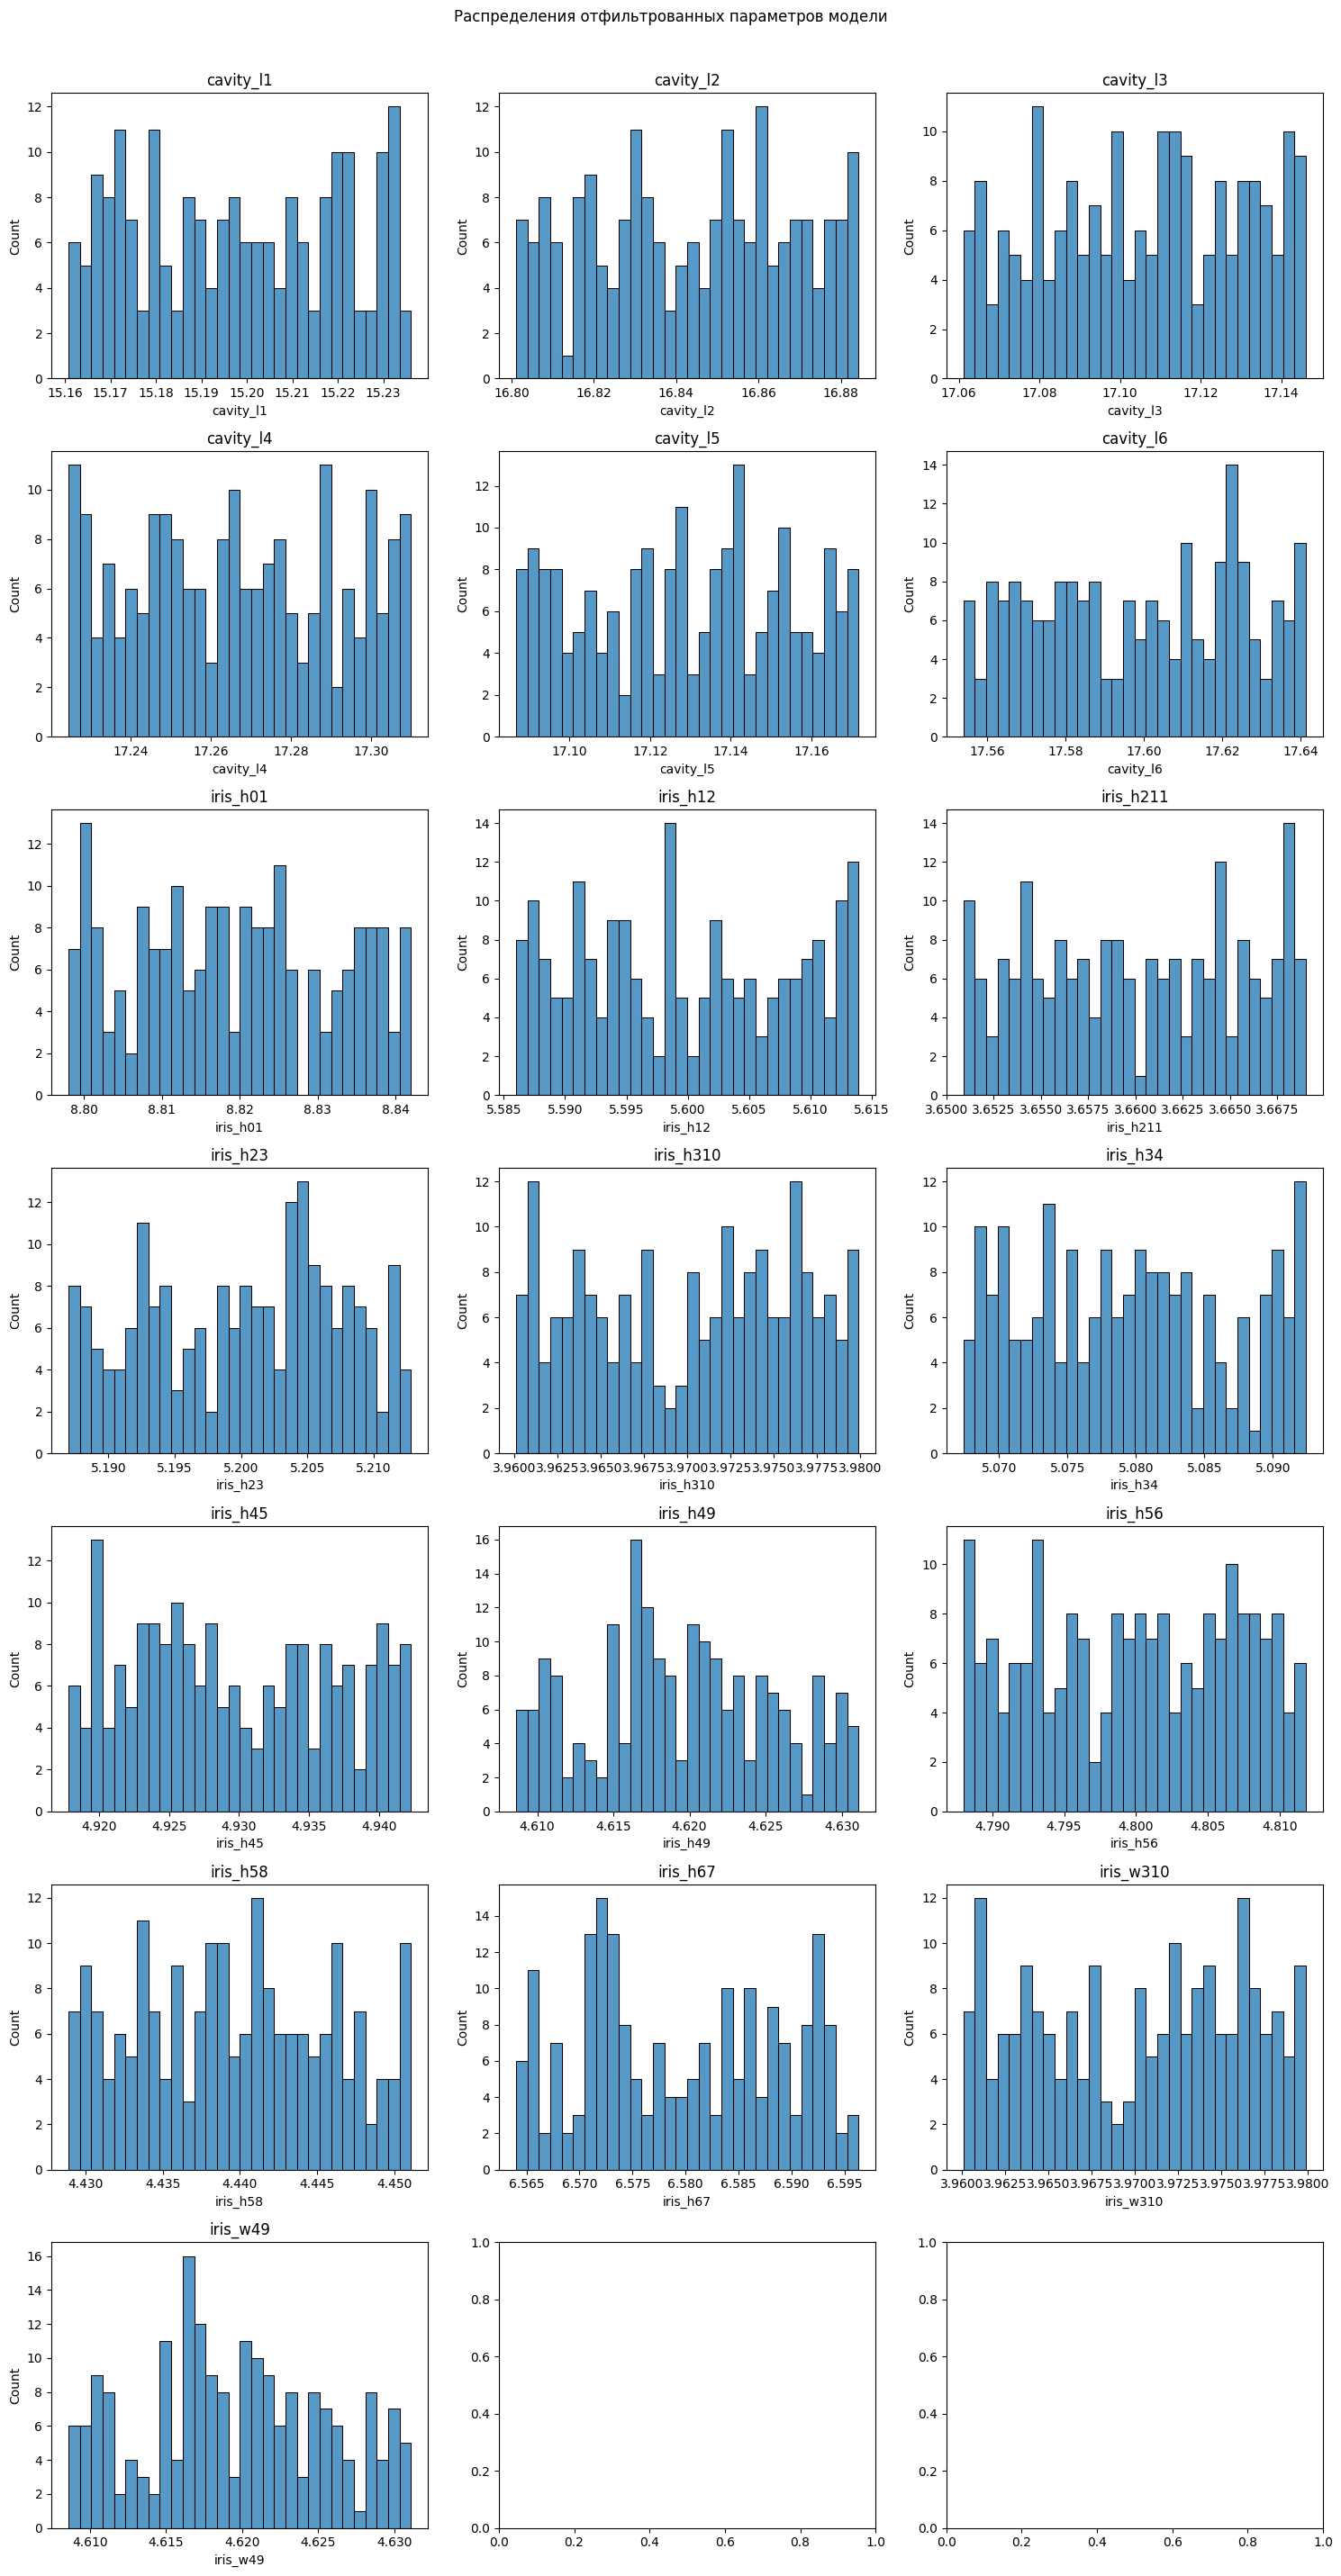

In [17]:
# Визуализируем распределения оставшихся (отфильтрованных) параметров
fig = analyzer_x.plot_param_distributions()
fig.suptitle("Распределения отфильтрованных параметров модели", y=1.02)
plt.show()

## 3 Трансформация S-параметров: использование `S_Crop`

### Ограничение частотного диапазона с помощью `S_Crop`

S-параметры Touchstone-файлов могут охватывать широкий частотный диапазон,  
но в практическом анализе часто важно сфокусироваться только на рабочей полосе.  
Класс `S_Crop` позволяет задать нужные границы частот и автоматически ограничить (обрезать) данные.
Следующий пример демонстрирует, как ограничить частотный диапазон центральными 50% от исходного.

In [18]:
# Определим частотный диапазон по первому элементу датасета
net0 = ds[0][1]
f_start, f_stop = net0.f[0], net0.f[-1]

# Задаем новый диапазон: оставим центральные 50%
f1 = f_start + 0.25 * (f_stop - f_start)
f2 = f_stop  - 0.25 * (f_stop - f_start)

# Получаем единицы измерения и масштаб для отображения
unit = net0.frequency.unit or "Hz"
mult = rf.Frequency.multiplier_dict[unit.lower()]

print(f"\nОграничим диапазон: с {f1 / mult:.3f} до {f2 / mult:.3f} {unit}")

# Создаем S-преобразователь с заданными границами
s_tf_crop = S_Crop(f_start=f1, f_stop=f2, unit='Hz')

# Пересоздаем датасет и анализатор с новым S-преобразованием
ds_crop = TouchstoneDataset(root=DATA_DIR, s_tf=s_tf_crop)
analyzer_crop = TouchstoneDatasetAnalyzer(ds_crop)


Ограничим диапазон: с 12.695 до 12.765 GHz


### Визуализация результата применения `S_Crop`

После применения `S_Crop` частотный диапазон данных сужается до заданных границ.  
На графике ниже показано, как изменилась статистика коэффициента передачи **S21**  
в результате обрезки частотной области.


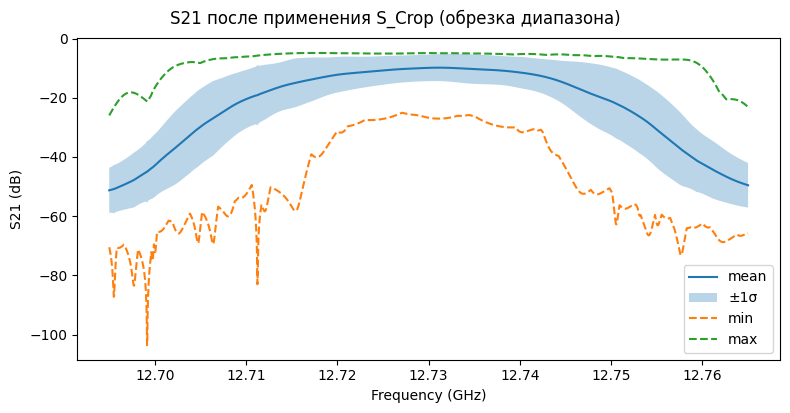

In [19]:
# Визуализируем, как изменился S21 (коэффициент передачи) после обрезки частотного диапазона
fig = analyzer_crop.plot_s_stats(port_out=2, port_in=1)
fig.suptitle("S21 после применения S_Crop (обрезка диапазона)", y=1.02)
plt.show()

## 4 Трансформация S-параметров: использование `S_Resample`

Класс `S_Resample` позволяет пересчитать S-параметры на новой частотной сетке.  
Это может быть полезно, если:

- нужно унифицировать размерность данных (например, для подачи в ML-модель),
- требуется сфокусироваться на определенной полосе частот,
- необходимо уменьшить объем данных.

Возможны два варианта использования.



### Вариант 1. Пересэмплирование по числу точек

Если требуется просто изменить количество точек в частотной сетке,  
можно передать желаемое число в конструктор `S_Resample`.  
В этом случае сетка будет автоматически построена равномерно в пределах исходного диапазона.

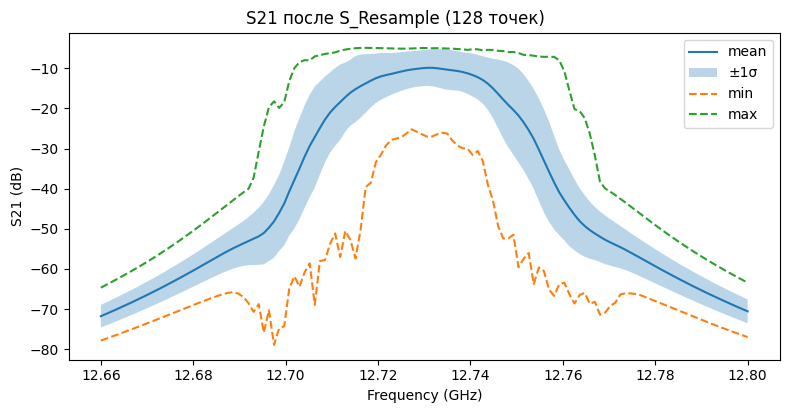

In [20]:
# Вариант 1: пересэмплируем до 128 равномерно распределенных точек
s_tf_resample1 = S_Resample(128)

ds_resample1 = TouchstoneDataset(root=DATA_DIR, s_tf=s_tf_resample1)
analyzer_resample1 = TouchstoneDatasetAnalyzer(ds_resample1)

fig = analyzer_resample1.plot_s_stats(port_out=2, port_in=1)
fig.suptitle("S21 после S_Resample (128 точек)", y=1.02)
plt.show()

### Вариант 2. Явное задание частотной сетки

Вместо указания количества точек можно вручную задать новую частотную сетку  
с помощью объекта `Frequency` из библиотеки `scikit-rf`.  
Это дает полный контроль над диапазоном и шагом дискретизации.


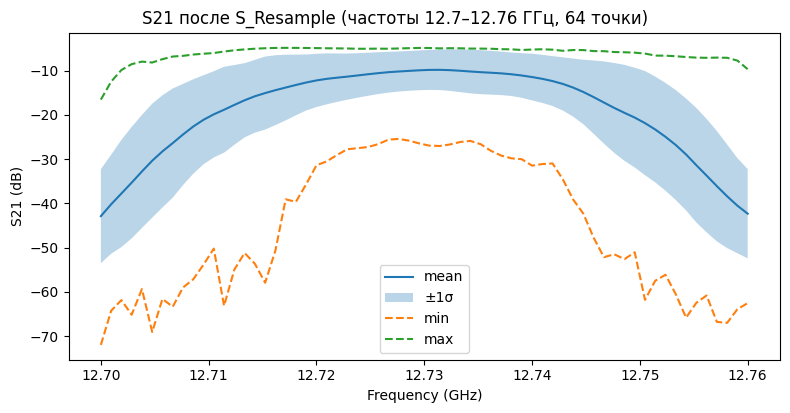

In [21]:
# Вариант 2: задаем новую частотную сетку вручную (12.7–12.76 ГГц, 64 точки)
f = rf.Frequency(12.7, 12.76, 64, unit="GHz")
s_tf_resample2 = S_Resample(f)

ds_resample2 = TouchstoneDataset(root=DATA_DIR, s_tf=s_tf_resample2)
analyzer_resample2 = TouchstoneDatasetAnalyzer(ds_resample2)

fig = analyzer_resample2.plot_s_stats(port_out=2, port_in=1)
fig.suptitle("S21 после S_Resample (частоты 12.7–12.76 ГГц, 64 точки)", y=1.02)
plt.show()

## 5 Комбинирование трансформаций: использование `TComposite`



Класс `TComposite` позволяет объединить несколько преобразований в единую цепочку,  
которая будет последовательно применяться к данным.

Это особенно удобно, когда нужно выполнить несколько этапов обработки подряд —  
например, сначала обрезать частотный диапазон, а затем пересэмплировать сетку,  
не создавая вручную вложенные вызовы преобразователей.

В следующем примере мы последовательно применим два преобразования:
1. **Обрезка частотного диапазона** с помощью `S_Crop`,
2. **Пересэмплирование** на фиксированное число точек с помощью `S_Resample`.


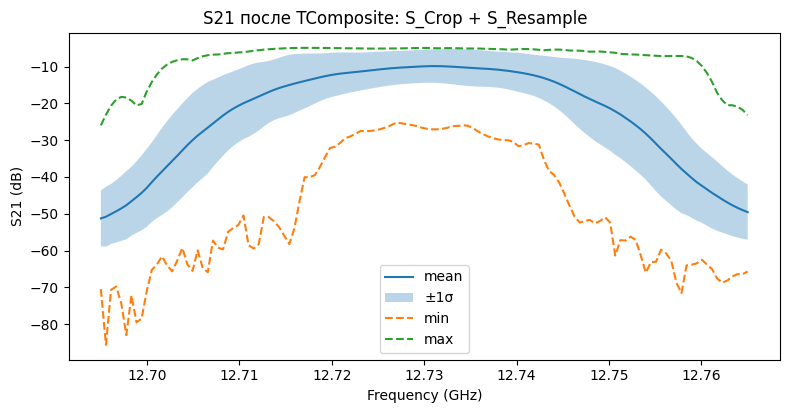

In [22]:
# Задаем составное преобразование:
# сначала S_Crop, затем S_Resample до 128 точек
s_tf_composite = TComposite([
    S_Crop(f_start=f1, f_stop=f2),
    S_Resample(128)
])

# Создаём новый датасет и анализатор с объединённым S-преобразованием
ds_composite = TouchstoneDataset(root=DATA_DIR, s_tf=s_tf_composite)
analyzer_composite = TouchstoneDatasetAnalyzer(ds_composite)

# Визуализируем результат (например, S21)
fig = analyzer_composite.plot_s_stats(port_out=2, port_in=1)
fig.suptitle("S21 после TComposite: S_Crop + S_Resample", y=1.02)
plt.show()